# Heart Disease Prediction Using BinaryClassification Models

### Dataset Features Details

In [1]:
Features_Details="""Feature------------>>:::  Detail \n
1\tAge------------>>:::  Age in years \n
2\tSex------------>>:::  1 Means male\t 0 Means female \n
3\tChest pain type------->>:::1 means typical angina 2 means atypical angina 3 means non-anginal pain \n \t\t4 means asymptomatic
4\tResting blood pressure------------>>:::  In mm hg on admission to the hospital \n
5\tSerum cholesterol------------>>:::  In mg/dI \n
6\tFasting blood sugar > 120 mg/dI------------>>:::  1 means blood sugar greater then 120 mg/dI 0  otherwise \n
7\tResting electrocardiographic results------------>>:::  0 Means normal 1 means Having ST-T wave abnormality \n \t\t2 means: showing probable or definite left ventricular hypertrophy by Estes’s criteria \n
8\tMaximum heart rate achieved------------>>:::  centered \n
9\tExercise-induced angina------------>>:::  1 means yes\t 0 means  no \n
10\tST depression induced by exercise relative to rest------------>>:::  In mm Hg on admission to the hospital \n
11\tNumber of major vessels------------>>:::  (0-3) colored by fluoroscopy \n
12\tThe slope of the peak exercise ST segment---->>:::1 means: upsloping 2 means: flat 3 means: downsloping \n
13\tThallium heart scan------------>>:::  3 for normal\t 6 for fixed defect\t 7 for reversible defect \n
14\tTarget------------>>::: 0 means: no disease\t 1 means: heart disease \n"""
print(Features_Details)

Feature------------>>:::  Detail 

1	Age------------>>:::  Age in years 

2	Sex------------>>:::  1 Means male	 0 Means female 

3	Chest pain type------->>:::1 means typical angina 2 means atypical angina 3 means non-anginal pain 
 		4 means asymptomatic
4	Resting blood pressure------------>>:::  In mm hg on admission to the hospital 

5	Serum cholesterol------------>>:::  In mg/dI 

6	Fasting blood sugar > 120 mg/dI------------>>:::  1 means blood sugar greater then 120 mg/dI 0  otherwise 

7	Resting electrocardiographic results------------>>:::  0 Means normal 1 means Having ST-T wave abnormality 
 		2 means: showing probable or definite left ventricular hypertrophy by Estes’s criteria 

8	Maximum heart rate achieved------------>>:::  centered 

9	Exercise-induced angina------------>>:::  1 means yes	 0 means  no 

10	ST depression induced by exercise relative to rest------------>>:::  In mm Hg on admission to the hospital 

11	Number of major vessels------------>>:::  (0-3) colored 

### Imporint Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import rc
%matplotlib inline

### Reading dataset

In [3]:
dataset=pd.read_csv("DataSet_Heart.csv")

### First 5 Rows of Dataset

In [4]:
dataset.head()

,age,sex_male,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Inforamtion about Dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                     303 non-null int64
sex_male                303 non-null int64
chest_pain              303 non-null int64
blood_pressure          303 non-null int64
serum_cholestoral       303 non-null int64
fasting_blood_sugar     303 non-null int64
electrocardiographic    303 non-null int64
max_heart_rate          303 non-null int64
induced_angina          303 non-null int64
ST_depression           303 non-null float64
slope                   303 non-null int64
vessels                 299 non-null float64
thal                    301 non-null float64
Target                  303 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


### Statistical summary of each columns

In [6]:
dataset.describe()

,age,sex_male,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Dataset Column Names and Shapes

In [7]:
print("Column names:")
print(list(dataset.columns))
print("\nNumber of Columns:")
print(len(list(dataset.columns)))
print("\nData Set size")
print(dataset.shape)

Column names:
['age', 'sex_male', 'chest_pain', 'blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar', 'electrocardiographic', 'max_heart_rate', 'induced_angina', 'ST_depression', 'slope', 'vessels', 'thal', 'Target']

Number of Columns:
14

Data Set size
(303, 14)


### Checking for Categerical Variables

In [8]:

#Categerical Variables
print("\n---Checking Categerical Variables --\n")
cols = dataset.columns
num_cols = dataset._get_numeric_data().columns
if (list(set(cols) - set(num_cols))):
    print("\n---Categerical Variables are there----\n")
else:
    print("\n---Categerical Variables are NOT there----\n")
    



---Checking Categerical Variables --


---Categerical Variables are NOT there----



### Missing Values are repalced with most_frequent element of respective column

In [9]:
#Missing Values
print("\n---Checking Missing values --\n")
NaNcheck=dataset.isnull().sum()
print(NaNcheck)

from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values="NaN",strategy="most_frequent",axis=0)
imputer=imputer.fit(dataset.iloc[:,11:13])
dataset.iloc[:,11:13]=imputer.fit_transform(dataset.iloc[:,11:13])
                                                         
                                                         
#Missing Values
print("\n---After replacing NULL values Checking Missing values --\n")
NaNcheck=dataset.isnull().sum()
print(NaNcheck)


---Checking Missing values --

age                     0
sex_male                0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
vessels                 4
thal                    2
Target                  0
dtype: int64

---After replacing NULL values Checking Missing values --

age                     0
sex_male                0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
vessels                 0
thal                    0
Target                  0
dtype: int64


C:\Users\arvin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Dividing Dataset into Independent and Dependent Columns

In [10]:

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
print("\n---Head of X---\n")
print(X.head())
print("\n---Head of y---\n")
print(y.head())




---Head of X---

   age  sex_male  chest_pain  blood_pressure  serum_cholestoral  \
0   63         1           1             145                233   
1   67         1           4             160                286   
2   67         1           4             120                229   
3   37         1           3             130                250   
4   41         0           2             130                204   

   fasting_blood_sugar  electrocardiographic  max_heart_rate  induced_angina  \
0                    1                     2             150               0   
1                    0                     2             108               1   
2                    0                     2             129               1   
3                    0                     0             187               0   
4                    0                     2             172               0   

   ST_depression  slope  vessels  thal  
0            2.3      3      0.0   6.0  
1            1.5

### Heart Disease Persons Percentages

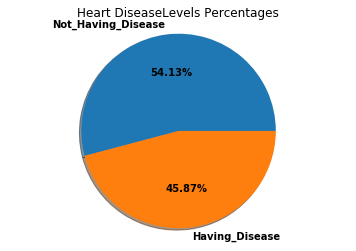

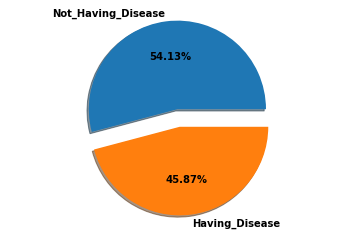

In [11]:
Not_Having_Disease = len(dataset[dataset.Target == 0])
Having_Disease =len(dataset[dataset.Target == 1])+len(dataset[dataset.Target == 2])+\
len(dataset[dataset.Target == 3])+len(dataset[dataset.Target == 4])
rc('font', weight='bold')
labels = ['Not_Having_Disease', 'Having_Disease']
values = [Not_Having_Disease, Having_Disease]
explode = (0.1, 0.1)

fig_Disease_Level_percentage, ax1 = plt.subplots()
plt.title('Heart Disease Levels Percentages\n\n')
ax1.pie(values,labels=labels, autopct='%1.2f%%',shadow=True)
ax1.axis('equal')
plt.title('Heart DiseaseLevels Percentages')
fig_Disease_Level_percentage, ax = plt.subplots()
ax.pie(values,explode=explode ,labels=labels, autopct='%1.2f%%',shadow=True)
ax.axis('equal')
plt.show()

In [12]:
y = y.apply(lambda x: 1 if x >= 1 else 0)

### Heart Disease Analysis with respect to Sex_Male

### Heart Disease Analysis with respect to Age

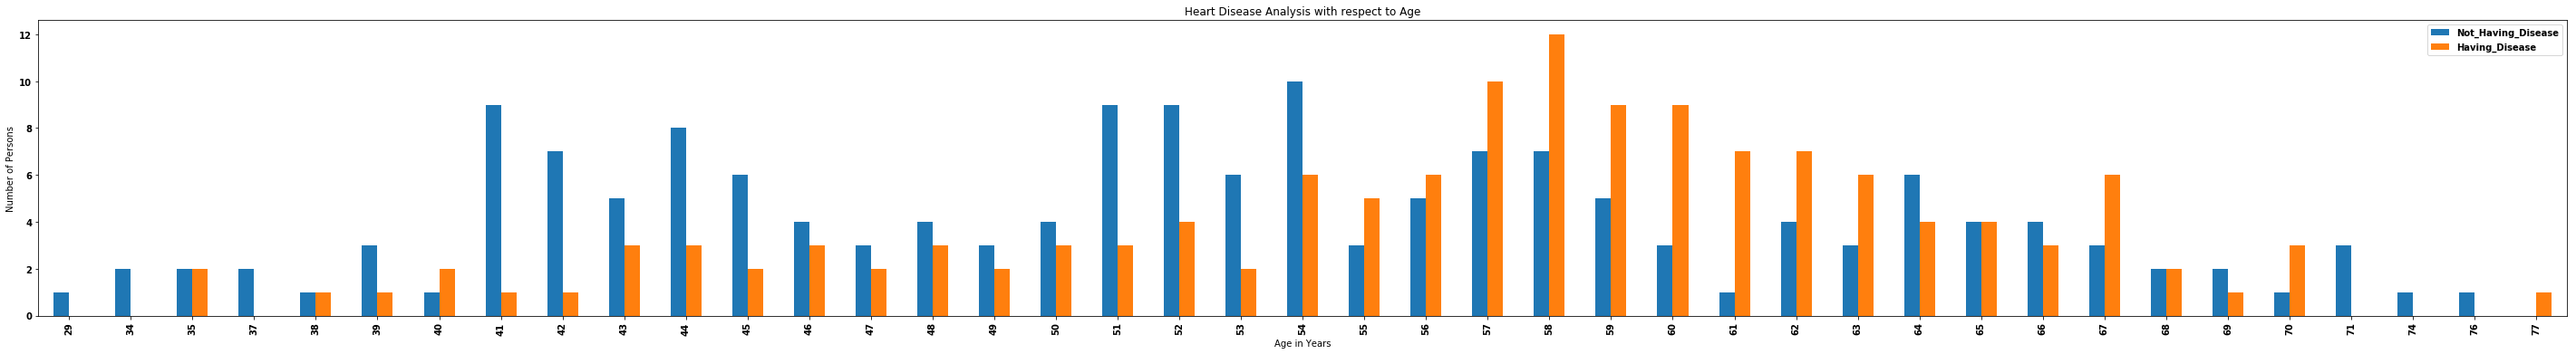

In [13]:
pd.crosstab(X.age,y).plot(kind="bar",figsize=(50,6))
plt.title('Heart Disease Analysis with respect to Age')
plt.xlabel('Age in Years')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

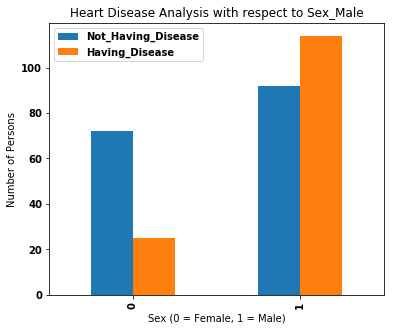

In [14]:
pd.crosstab(X.sex_male,y).plot(kind="bar",figsize=(6,5))
plt.title('Heart Disease Analysis with respect to Sex_Male')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to Chest Pain Types

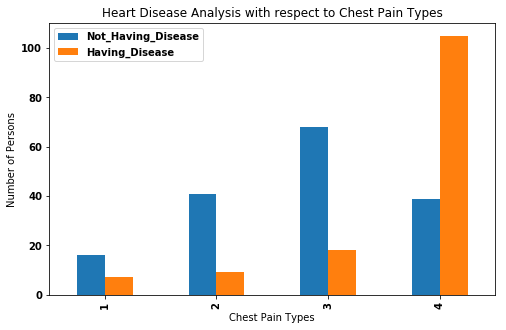

In [15]:
pd.crosstab(X.chest_pain,y).plot(kind="bar",figsize=(8,5))
plt.title('Heart Disease Analysis with respect to Chest Pain Types')
plt.xlabel('Chest Pain Types')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to Blood Pressure

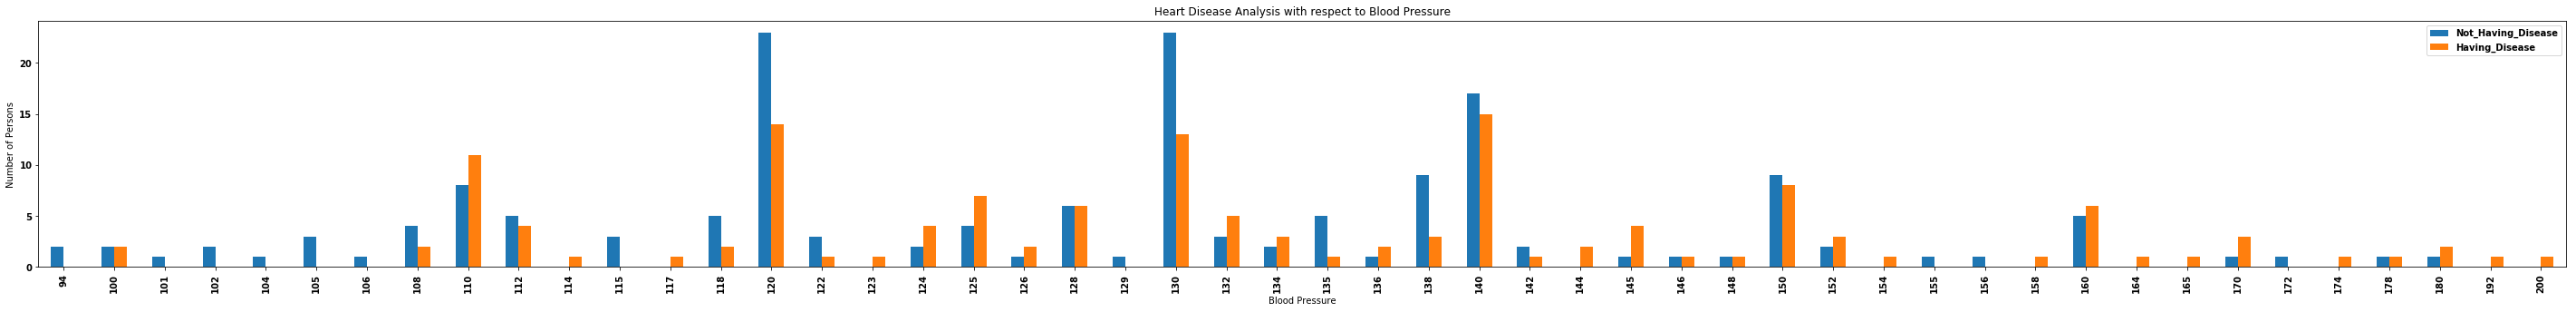

In [16]:
pd.crosstab(X.blood_pressure,y).plot(kind="bar",figsize=(50,5))
plt.title('Heart Disease Analysis with respect to Blood Pressure')
plt.xlabel('Blood Pressure')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to Serum Cholestoral

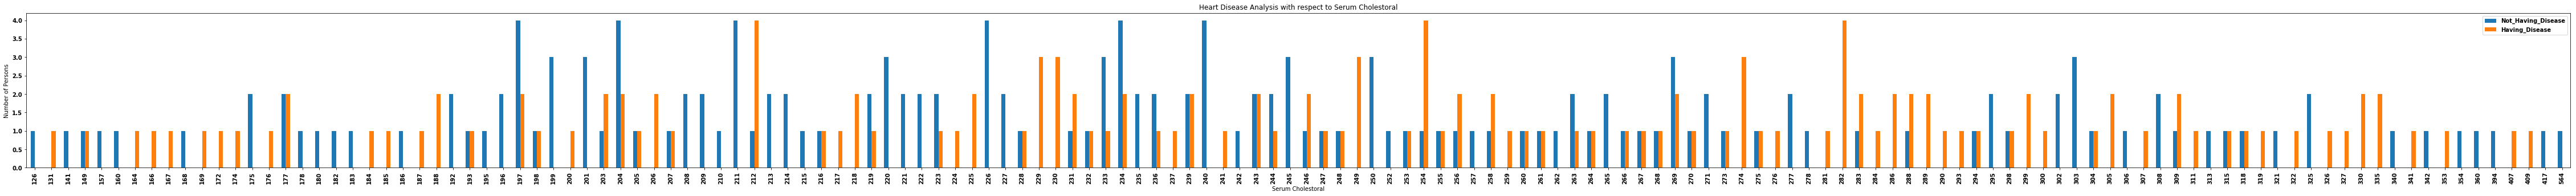

In [17]:
pd.crosstab(X.serum_cholestoral,y).plot(kind="bar",figsize=(80,5))
plt.title('Heart Disease Analysis with respect to Serum Cholestoral')
plt.xlabel('Serum Cholestoral')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to fasting_blood_sugar

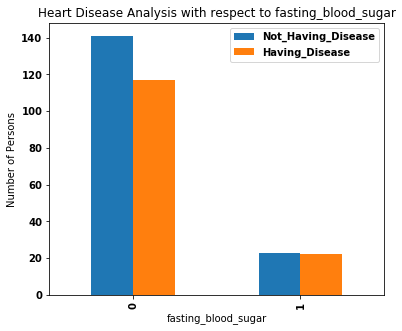

In [18]:
pd.crosstab(X.fasting_blood_sugar,y).plot(kind="bar",figsize=(6,5))
plt.title('Heart Disease Analysis with respect to fasting_blood_sugar')
plt.xlabel('fasting_blood_sugar')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to electrocardiographic

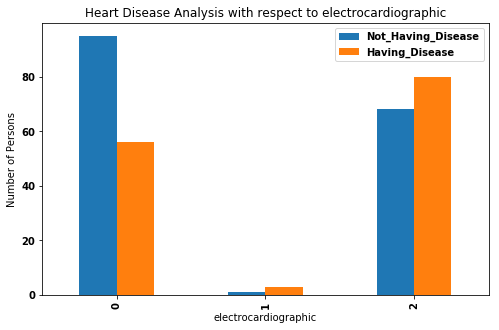

In [19]:
pd.crosstab(X.electrocardiographic,y).plot(kind="bar",figsize=(8,5))
plt.title('Heart Disease Analysis with respect to electrocardiographic')
plt.xlabel('electrocardiographic')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to max_heart_rate

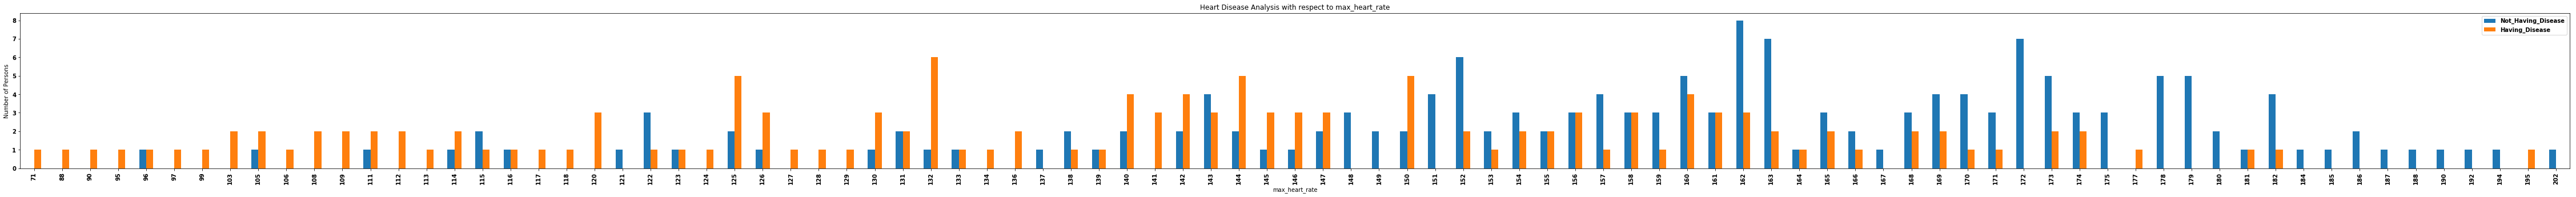

In [20]:
pd.crosstab(X.max_heart_rate,y).plot(kind="bar",figsize=(80,5))
plt.title('Heart Disease Analysis with respect to max_heart_rate')
plt.xlabel('max_heart_rate')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to induced_angina

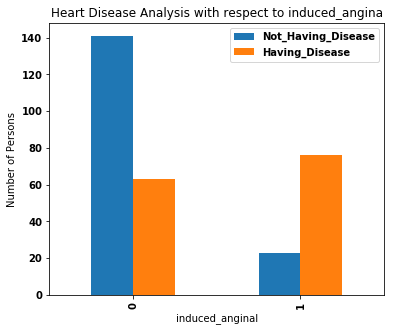

In [21]:
pd.crosstab(X.induced_angina,y).plot(kind="bar",figsize=(6,5))
plt.title('Heart Disease Analysis with respect to induced_angina')
plt.xlabel('induced_anginal')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to ST_depression

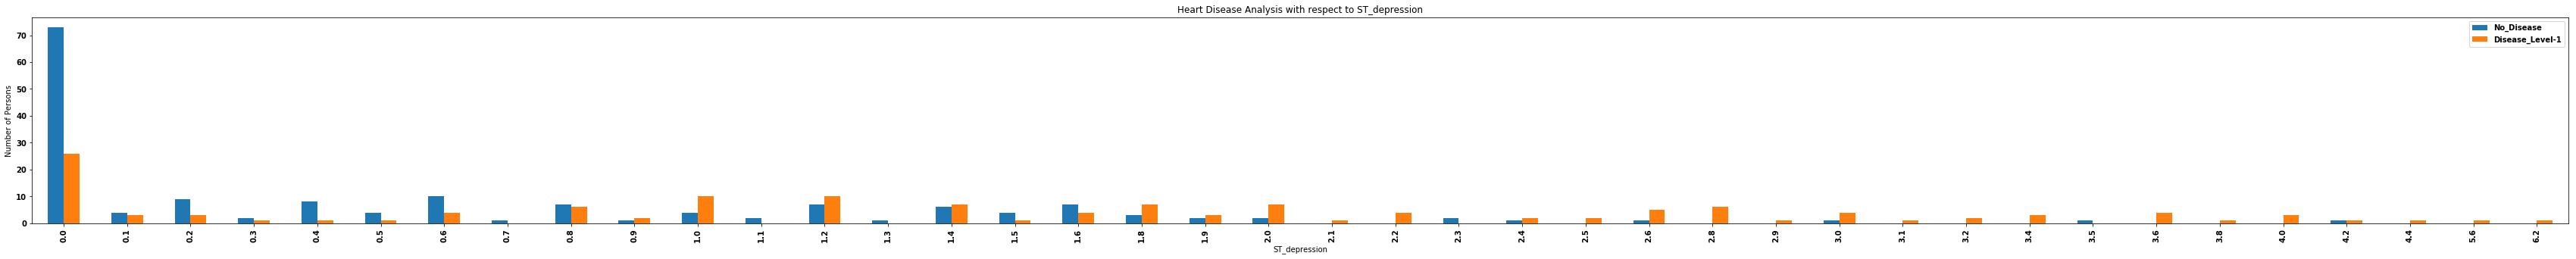

In [22]:
pd.crosstab(X.ST_depression,y).plot(kind="bar",figsize=(60,5))
plt.title('Heart Disease Analysis with respect to ST_depression')
plt.xlabel('ST_depression')
plt.legend(['No_Disease', 'Disease_Level-1', 'Disease_Level-2', 'Disease_Level-3','Disease_Level-4'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to Serum Cholestoral

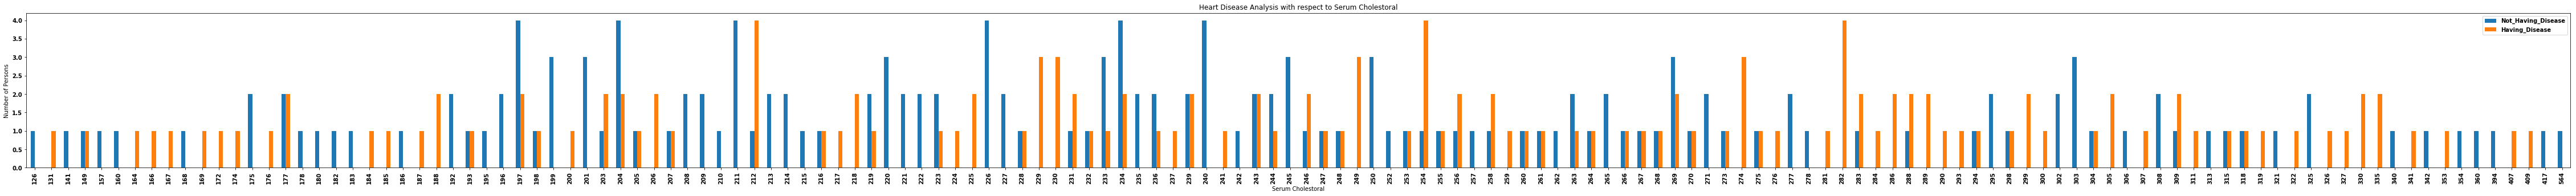

In [23]:
pd.crosstab(X.serum_cholestoral,y).plot(kind="bar",figsize=(80,5))
plt.title('Heart Disease Analysis with respect to Serum Cholestoral')
plt.xlabel('Serum Cholestoral')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to slope

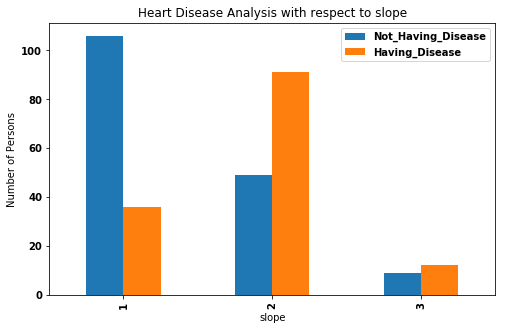

In [24]:
pd.crosstab(X.slope,y).plot(kind="bar",figsize=(8,5))
plt.title('Heart Disease Analysis with respect to slope')
plt.xlabel('slope')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Disease Analysis with respect to vessels

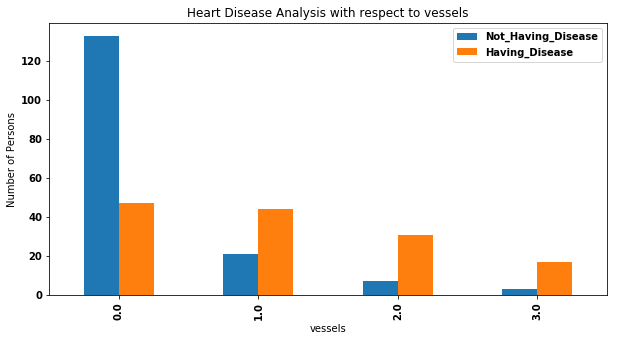

In [25]:
pd.crosstab(X.vessels,y).plot(kind="bar",figsize=(10,5))
plt.title('Heart Disease Analysis with respect to vessels')
plt.xlabel('vessels')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Heart Diseases Analysis with respect to thal

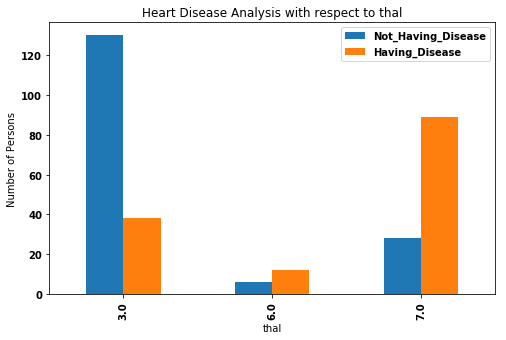

In [26]:
pd.crosstab(X.thal,y).plot(kind="bar",figsize=(8,5))
plt.title('Heart Disease Analysis with respect to thal')
plt.xlabel('thal')
plt.legend(['Not_Having_Disease', 'Having_Disease'])
plt.ylabel('Number of Persons')
plt.show()

### Correlation Between Features

In [27]:
correlation = dataset.corr()
correlation

,age,sex_male,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,Target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.222853
sex_male,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.224469
chest_pain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.407075
blood_pressure,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.157754
serum_cholestoral,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.070909
fasting_blood_sugar,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.059186
electrocardiographic,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.183696
max_heart_rate,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.415040
induced_angina,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.397057
ST_depression,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.504092


### Spliting Dataset into Traing set and Testing set

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

### Feature Scaling

In [29]:
stdScalaer=StandardScaler()
X_train=stdScalaer.fit_transform(X_train)
X_test=stdScalaer.fit_transform(X_test)


C:\Users\arvin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\arvin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\arvin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\arvin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
print(X_test)

[[ 0.5791864  -1.53960072  0.90605398 ...  0.58349544  1.28276026
   1.18357233]
 [-0.43873991  0.64951905 -0.12458242 ...  0.58349544 -0.69573438
  -0.8976853 ]
 [-0.32563699  0.64951905 -1.15521882 ... -0.9335927  -0.69573438
  -0.8976853 ]
 ...
 [-1.34356329  0.64951905 -0.12458242 ... -0.9335927   0.29351294
  -0.8976853 ]
 [-1.68287206  0.64951905 -2.18585522 ... -0.9335927  -0.69573438
   1.18357233]
 [ 0.35298055  0.64951905 -0.12458242 ... -0.9335927   1.28276026
   1.18357233]]


In [31]:
print(X_train)

[[ 0.85218175 -1.42427927  0.86617744 ...  2.36151212  1.50971104
  -0.88708588]
 [-0.35736654  0.7021095  -0.18313466 ...  0.68151021 -0.72066346
  -0.88708588]
 [-1.23703802  0.7021095   0.86617744 ... -0.9984917  -0.72066346
  -0.88708588]
 ...
 [ 0.52230494  0.7021095  -1.23244676 ... -0.9984917  -0.72066346
  -0.88708588]
 [ 0.30238707 -1.42427927 -1.23244676 ...  0.68151021  0.39452379
  -0.88708588]
 [ 0.96214068  0.7021095   0.86617744 ... -0.9984917   1.50971104
   1.17386981]]


### Models Building and traing

In [32]:
#Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=15)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = "entropy",max_depth=4,min_samples_split=18)


knn_model=knn_model.fit(X_train, y_train)
nb_model=nb_model.fit(X_train, y_train)
dt_model=dt_model.fit(X_train, y_train)


In [33]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_curve,mean_squared_error
from sklearn import metrics

def modelAccuracy(y_test, y_pred):
    model_result=[]
    model_accuracy=metrics.accuracy_score(y_test, y_pred)
#     print(" Model  Accuracy:----->  %f \n" %(model_accuracy))
    Recall_Score=recall_score(y_test,y_pred)
#     print(" Model  Recall_Score:----->  %f \n" %(Recall_Score))
    Precision_score=precision_score(y_test,y_pred)
#     print(" Model  Precision_score:----->  %f \n" %(Precision_score))
    F1_score=f1_score(y_test,y_pred)
#     print(" Model  F1_score:----->  %f \n" %(F1_score))
    model_result=np.array([model_accuracy,Recall_Score,Precision_score,F1_score])*100
    return(list(model_result))

In [34]:
knn_results=modelAccuracy(y_test, knn_model.predict(X_test))
nb_results=modelAccuracy(y_test, nb_model.predict(X_test))
dt_results=modelAccuracy(y_test, dt_model.predict(X_test))

In [35]:
data = [
        [knn_results[0],nb_results[0],dt_results[0]],
        [knn_results[1],nb_results[1],dt_results[1]],
        [knn_results[2],nb_results[2],dt_results[2]],
        [knn_results[3],nb_results[3],dt_results[3]]
       ]
result_DF=pd.DataFrame({'Model':["KNN","NB","DT"],'Acuuracy':data[0],'Recall':data[1],'Precission':data[3]})

### Models Results

In [36]:
result_DF

,Model,Acuuracy,Recall,Precission
0,KNN,90.109890,91.666667,88.000000
1,NB,86.813187,88.888889,84.210526
2,DT,89.010989,86.111111,86.111111


### Models Results Comparision

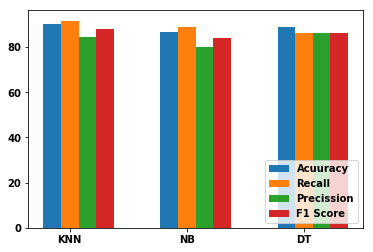

In [37]:
barWidth = 0.15
bar1 = data[0]
bar2 = data[1]
bar3 = data[2]
bar4 = data[3]

x1 = np.arange(len(bar1))
x2 = [x + barWidth for x in x1]
x3 = [x + barWidth for x in x2]
x4 = [x + barWidth for x in x3]
 
# Make the plot
plt.bar(x1, bar1, width=barWidth, label='Acuuracy')
plt.bar(x2, bar2, width=barWidth, label='Recall')
plt.bar(x3, bar3, width=barWidth, label='Precission')
plt.bar(x4, bar4, width=barWidth, label='F1 Score')

plt.xticks([r + barWidth for r in range(len(bar1))], ['KNN','NB','DT'])
plt.autoscale()
 
# Create legend & Show graphic
plt.legend(loc=4)
plt.show()




### ROC Curve for KNN,NB and DT

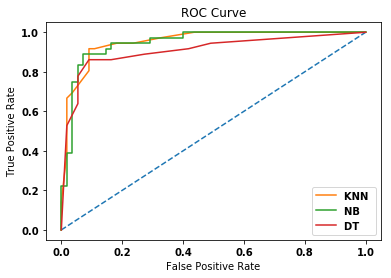

In [38]:
def rocCurveDrawing(models,X_test,y_test):
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], '--')
    y_pred_prob = models[0].predict_proba(X_test)[:, 1]
    fpr, tpr, thresh= roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label='KNN ')
    
    y_pred_prob = models[1].predict_proba(X_test)[:, 1]
    fpr, tpr, thresh= roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label='NB ')
    
    y_pred_prob = models[2].predict_proba(X_test)[:, 1]
    fpr, tpr, thresh= roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label='DT ')
    
    plt.legend(loc='best')
    
    
rocCurveDrawing([knn_model,nb_model,dt_model],X_test,y_test)

In [39]:
"""from sklearn.cross_validation import cross_val_score
knn_=cross_val_score(knn_model, X, y, cv=12).mean()
nb_=cross_val_score(nb_model, stdScalaer.fit_transform(X), y, cv=12).mean()
dt_=cross_val_score(dt_model, stdScalaer.fit_transform(X), y, cv=12).mean()
print(knn_,nb_,dt_)"""

'from sklearn.cross_validation import cross_val_score\nknn_=cross_val_score(knn_model, X, y, cv=12).mean()\nnb_=cross_val_score(nb_model, stdScalaer.fit_transform(X), y, cv=12).mean()\ndt_=cross_val_score(dt_model, stdScalaer.fit_transform(X), y, cv=12).mean()\nprint(knn_,nb_,dt_)'

### Manualy Comparison of Predicted and Actaul Values

In [40]:
print(list(y_test))

[1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]


In [41]:
print(list(knn_model.predict(X_test)))
print(list(nb_model.predict(X_test)))
print(list(dt_model.predict(X_test)))

[1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]


In [42]:
c=0
for i in range (len(list(dt_model.predict(X_test)))):
    if list(y_test)[i]==list(dt_model.predict(X_test))[i]:
        c=c+1
print(c)
print(len(list(dt_model.predict(X_test))))
print(c/91)

c=0
for i in range (len(list(knn_model.predict(X_test)))):
    if list(y_test)[i]==list(knn_model.predict(X_test))[i]:
        c=c+1
print(c)
print(len(list(dt_model.predict(X_test))))
print(c/91)

c=0
for i in range (len(list(nb_model.predict(X_test)))):
    if list(y_test)[i]==list(nb_model.predict(X_test))[i]:
        c=c+1
print(c)
print(len(list(dt_model.predict(X_test))))
print(c/91)


81
91
0.8901098901098901
82
91
0.9010989010989011
79
91
0.8681318681318682
